In [15]:
import pandas as pd

#Basic operations
DF = pd.read_csv("iris.csv")

#Project [selecting a column]
DF[['D0']]
#Select [Selecting Rows]
DF[:5]
#Select [with booleans]
#Select * from IRIS where D0 > 5 
DF[DF['D0']>5]
#NEGATION
DF[~(DF['D0']>5)]
#Conjunction
DF[~(DF['D0']>5) & (DF['D3']<0.5)]
#Disjunction
DF[~(DF['D0']>5) | (DF['D3']<0.5)]

#Merge
Emp = pd.DataFrame({'emp_id': [1, 2, 3], 'name': ['Alice', 'Bob','Carl'], 'dept':['D1','D2','D3']})
Dep = pd.DataFrame({'dno': ['D1', 'D2'], 'name': ['HR', 'RD']})
#pd.merge(Emp,Dep,on='dept')
#Select * from Emp e,Dep d where e.dept=d.dno
pd.merge(Emp,Dep,left_on='dept',right_on='dno')
#lEFT OUTER JOIN
pd.merge(Emp,Dep,left_on='dept',right_on='dno',how='outer')


dept  emp_id name_x  dno name_y
0   D1       1  Alice   D1     HR
1   D2       2    Bob   D2     RD
2   D3       3   Carl  NaN    NaN

Populating the interactive namespace from numpy and matplotlib


C:\Users\dkesha\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


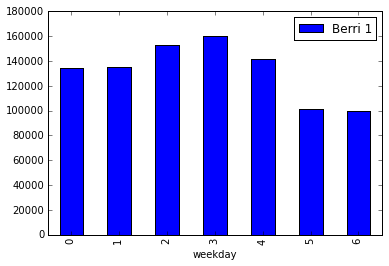

In [36]:
import pandas as pd
import numpy as np
#ANlyzing bike route usage per weekday
bikes = pd.read_csv('bikes.csv',sep=';', encoding='latin1',parse_dates=['Date'], dayfirst=True,index_col='Date')
#bikes[:5][bikes['Berri 1']==35]
#bikes[:5]
beri_bikes = bikes[['Berri 1']]
beri_bikes['weekday'] = beri_bikes.index.weekday
%pylab inline
#beri_bikes.groupby("weekday").aggregate(sum).plot()
beri_bikes.groupby("weekday").aggregate(sum).plot(kind="bar")


In [41]:
import pandas as pd
#combine dataframes
d1 = pd.read_csv("climate.csv",skiprows=16, index_col='Date/Time', parse_dates=True, encoding='latin1')
d2 = pd.read_csv("climate-1.csv",skiprows=16, index_col='Date/Time', parse_dates=True, encoding='latin1')
#d1[:5]
#d2[:5]
d_1_clean = d1.dropna(axis=1,how='any')
d_2_clean = d2.dropna(axis=1,how='any')
d_full = pd.concat([d_1_clean,d_2_clean])
#pd.to_csv(d_full)



In [53]:
import pandas as pd
#Time series
%pylab inline
index = pd.date_range('1/1/2000', periods=9, freq='T')
series = pd.Series(np.random.normal(size=9), index=index)
#series.plot()
#series
#series.resample('3T')
series.resample('30S').ffill()

Populating the interactive namespace from numpy and matplotlib


2000-01-01 00:00:00    1.372855
2000-01-01 00:00:30    1.372855
2000-01-01 00:01:00    0.081738
2000-01-01 00:01:30    0.081738
2000-01-01 00:02:00   -1.406352
2000-01-01 00:02:30   -1.406352
2000-01-01 00:03:00    0.050274
2000-01-01 00:03:30    0.050274
2000-01-01 00:04:00   -0.237599
2000-01-01 00:04:30   -0.237599
2000-01-01 00:05:00   -1.422955
2000-01-01 00:05:30   -1.422955
2000-01-01 00:06:00    1.025984
2000-01-01 00:06:30    1.025984
2000-01-01 00:07:00   -1.239270
2000-01-01 00:07:30   -1.239270
2000-01-01 00:08:00    1.105326
Freq: 30S, dtype: float64

In [57]:
import pandas as pd
import json
from pandas.io.json import json_normalize
#coNVERTING JSON TO DATAFRAME
with open('yelp.json',encoding="utf-8") as data_file:    
    data = json.load(data_file)
DF = pd.DataFrame(data)
DF_normed = json_normalize(data)
DF_normed

business_id        date               review_id  stars    type  \
0  vcNAWiLM4dR7D2nwwJ7nCA  2010-03-22  RF6UnRTtG7tWMcrO2GEoAg      2  review   
1  vcNAWiLM4dR7D2nwwJ7nCA  2012-02-14  -TsVN230RCkLYKBeLsuz7A      4  review   
2  mVHrayjG3uZ_RLHkLj-AMg  2012-12-01  6w6gMZ3iBLGcUM4RBIuifQ      5  review   
3  mVHrayjG3uZ_RLHkLj-AMg  2013-03-30  3Es8GsjkssusYgeU6_ZVpQ      5  review   
4  mVHrayjG3uZ_RLHkLj-AMg  2013-10-20  KAkcn7oQP1xX8KsZ-XmktA      4  review   

                  user_id  votes.cool  votes.funny  votes.useful  
0  H1kH6QZV7Le4zqTRNxoZow           0            0             2  
1  zvJCcrpm2yOZrxKffwGQLA           1            0             1  
2  LWbYpcangjBMm4KPxZGOKg           0            0             5  
3  8fApIAMHn2MZJFUiCQto5Q           1            0             2  
4  uK8tzraOp4M5u3uYrqIBXg           0            0             1

In [65]:
import requests
import pandas as pd
import json
from pandas.io.json import json_normalize

#Downloading JSON data froma URL
url = 'https://api.stackexchange.com/2.2/search?order=desc&sort=activity&intitle=perl&site=stackoverflow'
resp = requests.get(url)
#json_normalize(resp.text)
data = json.loads(resp.text)
json_normalize(data)


has_more                                              items  quota_max  \
0     True  [{'is_answered': True, 'view_count': 17, 'ques...        300   

   quota_remaining  
0              292